<a href="https://colab.research.google.com/github/ViFLara/Statistics-and-Machine-Learning/blob/master/Aula2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [3]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
4,Recife,2019-02-14,19.89,983,7
110,Recife,2019-03-02,51.98,983,6
100,Natal,2019-01-02,190.97,1036,2
44,Salvador,2019-01-01,43.26,1037,2
177,Salvador,2019-01-02,41.19,1037,2


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df['LojaID'] = df['LojaID'].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# Handling missing values

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
# Replacing null values with the mean
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [14]:
df['Vendas'].mean()

122.61180089485438

In [15]:
# Replacing null values with zero
df['Vendas'].fillna(0, inplace=True)

In [16]:
# Erasing lines with null values
df.dropna(inplace=True)

In [17]:
df.dropna(subset=['Vendas'], inplace=True)

In [18]:
# Removing rows with missing values in all columns
df.dropna(how="all", inplace=True)

# Creating new columns

In [19]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [23]:
df['Receita'].max()

3544.0

In [24]:
df['Receita'].min()

3.34

In [25]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [26]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
df.groupby("Cidade")['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Working with dates

In [29]:
df['Data'] = df['Data'].astype("int64")

In [30]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [31]:
df['Data'] = pd.to_datetime(df['Data'])

In [32]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [33]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [34]:
df['Ano_Venda'] = df['Data'].dt.year

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
85,Aracaju,2018-01-01,15.17,1521,1,15.17,1.0,2018
148,Natal,2019-01-02,40.59,1037,3,121.77,3.0,2019
26,Natal,2018-07-20,370.00,853,3,1110.00,3.0,2018
89,Aracaju,2018-01-01,10.15,1523,7,71.05,7.0,2018
29,Fortaleza,2019-01-01,186.29,1005,2,372.58,2.0,2019


In [36]:
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2
42,Salvador,2019-01-01,44.28,1034,1,44.28,1.0,2019,1,1
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,5.0,2019,1,1
185,Natal,2019-01-02,6.67,1036,1,6.67,1.0,2019,1,2
23,Natal,2019-02-14,304.00,854,3,912.00,3.0,2019,2,14


In [38]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [39]:
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
87,Recife,2019-01-01,210.06,983,4,840.24,4.0,2019,1,1,365 days
89,Fortaleza,2019-01-01,7.19,1004,5,35.95,5.0,2019,1,1,365 days
39,Salvador,2019-01-01,165.95,1036,3,497.85,3.0,2019,1,1,365 days
141,Natal,2019-01-02,9.08,1036,1,9.08,1.0,2019,1,2,366 days
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018,9,12,254 days


In [41]:
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019,1,1,365 days,1
91,Salvador,2019-01-01,17.74,1035,1,17.74,1.0,2019,1,1,365 days,1
93,Recife,2019-01-01,17.45,980,6,104.70,6.0,2019,1,1,365 days,1
60,Salvador,2019-01-01,96.01,1034,2,192.02,2.0,2019,1,1,365 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1


In [43]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [44]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Data visualization

In [45]:
df['LojaID'].value_counts(ascending=False) # quantas vendas tem para cada LojaID

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

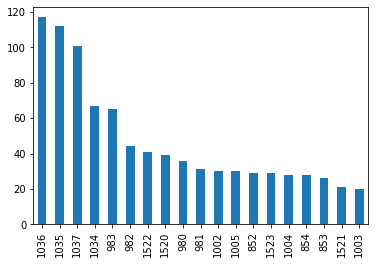

In [46]:
df['LojaID'].value_counts(ascending=False).plot.bar();

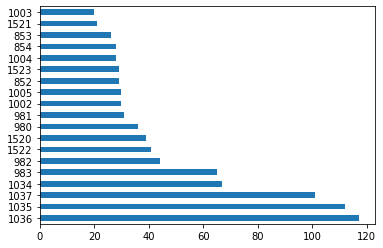

In [47]:
df['LojaID'].value_counts().plot.barh();

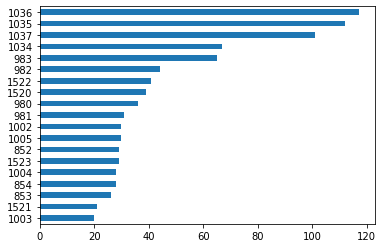

In [48]:
df['LojaID'].value_counts(ascending=True).plot.barh();

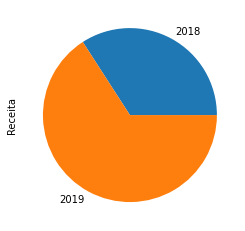

In [49]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [50]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

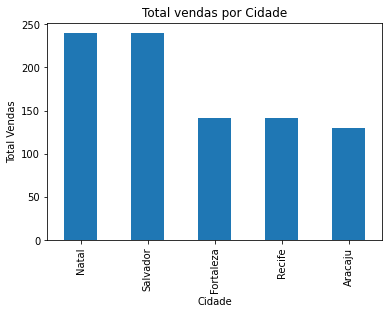

In [51]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

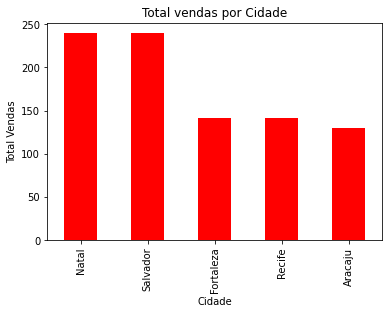

In [52]:
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [53]:
plt.style.use("ggplot")

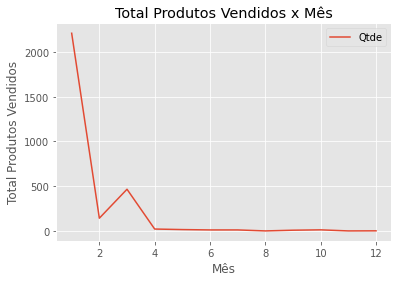

In [54]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title= "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [55]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [56]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(marker = "v")

KeyError: ignored